# Modelagem 3D de uma esfera

## Importando as bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sphere_grav

## Gerando os parâmetros do sistema de coordenadas 

In [3]:
Nx = 100
Ny = 50
area = [-1000.,1000.,-1000.,1000.]
shape = (Nx,Ny)

In [4]:
x = np.linspace(area[0],area[1],num=Nx)
y = np.linspace(area[2],area[3],num=Ny) 
yc,xc = np.meshgrid(y,x)

In [5]:
voo = -100.
zc = voo*np.ones_like(xc)

In [6]:
coordenadas = np.array([yc.ravel(),xc.ravel(),zc.ravel()])

In [7]:
coordenadas.shape

(3, 5000)

## Gerando os parâmetros do prisma

In [8]:
rho = np.array([300.,-300.])
modelo = np.array([[-400,-400,150,100],
                   [400,400,150,100]])

## Cálculo das componentes do campo de gravidade e do potencial

In [9]:
potencial = sphere_grav.gravitational(coordenadas,modelo,rho,field="potential")

In [10]:
gz = sphere_grav.gravitational(coordenadas,modelo,rho,field="g_z")

In [11]:
gx = sphere_grav.gravitational(coordenadas,modelo,rho,field="g_x")

In [12]:
gy = sphere_grav.gravitational(coordenadas,modelo,rho,field="g_y")

## Visualização dos dados calculados 

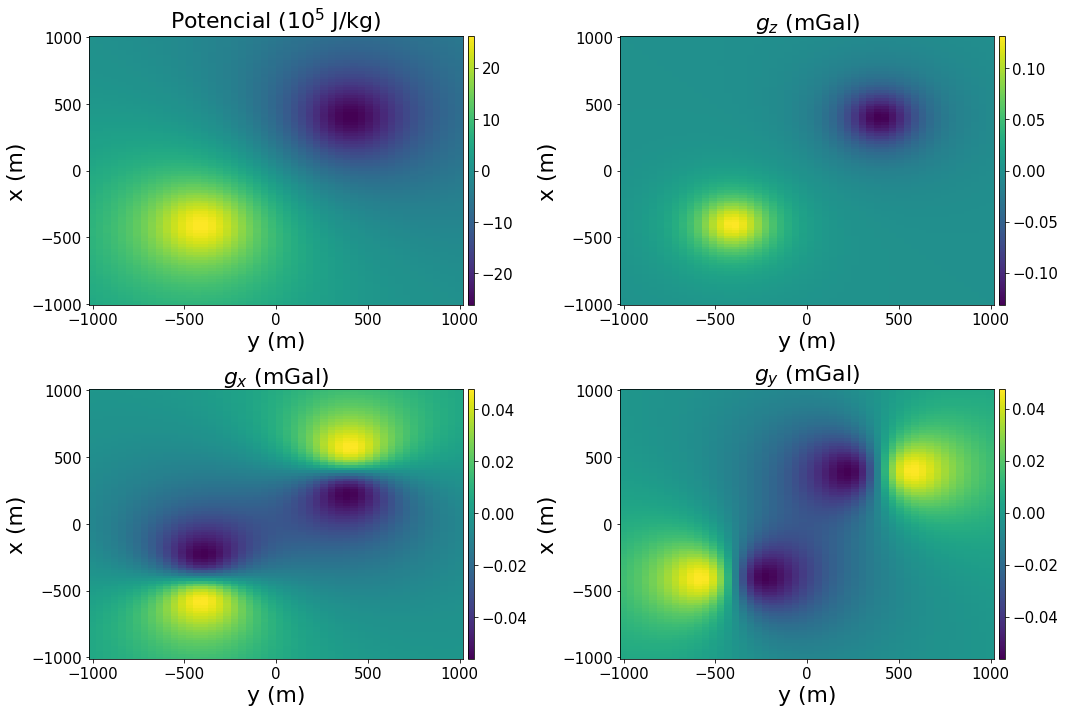

In [13]:
title_font = 22
bottom_font = 15
plt.close('all')
plt.figure(figsize=(15,10), tight_layout=True)

plt.subplot(2,2,1)
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('Potencial ($10^5$ J/kg)', fontsize=title_font)
plt.pcolor(yc,xc,potencial.reshape(shape),shading='auto',cmap='viridis')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.ax.tick_params(labelsize=bottom_font)

plt.subplot(2,2,2)
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('$g_z$ (mGal)', fontsize=title_font)
plt.pcolor(yc,xc,gz.reshape(shape),shading='auto',cmap='viridis')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.ax.tick_params(labelsize=bottom_font)

plt.subplot(2,2,3)
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('$g_x$ (mGal)', fontsize=title_font)
plt.pcolor(yc,xc,gx.reshape(shape),shading='auto',cmap='viridis')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.ax.tick_params(labelsize=bottom_font)

plt.subplot(2,2,4)
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('$g_y$ (mGal)', fontsize=title_font)
plt.pcolor(yc,xc,gy.reshape(shape),shading='auto',cmap='viridis')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.ax.tick_params(labelsize=bottom_font)

file_name = 'images/forward_modeling_mag_sphere_grav'
plt.savefig(file_name+'.png',dpi=300)

plt.show()